# p24: Pseudospectra of Davies's complex harmonic oscillator

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from chebPy import cheb
from numpy import dot,argsort,zeros,real,imag,meshgrid,eye,diag,arange
from scipy.linalg import solve,eig,svd,svdvals
from matplotlib.pyplot import figure,plot,title,axis,contour

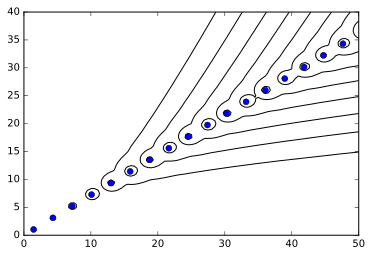

In [5]:
N = 70; D, x = cheb(N); x = x[1:N];
L = 6.0; x = L*x; D = D/L;
A = -dot(D,D);
A = A[1:N,1:N] + (1+3j)*diag(x**2);
lam, v = eig(A)
fig = figure()
plot(real(lam),imag(lam),"o")
axis([0, 50, 0, 40])

h = 0.5 #Smaller the value, finer the plot
x = arange(0,50+h,h); y = arange(0,40+h,h); xx,yy = meshgrid(x,y);
zz = xx + 1j*yy;
I = eye(N-1); sigmin = zeros((len(y),len(x))) 
for j in range(0,len(x)):
    for i in range(0,len(y)):
        sigmin[i,j] = min(svdvals(zz[i,j]*I - A));

levels = 10.0**arange(-4.5,0.0,0.5);
contour(x,y,sigmin,levels,colors = 'k');